
# The Gradient

Say you have some function that takes in multiple variables as input and returns a scalar value. As an example, think of a function where the inputs are GPS coordinates, latitude and longitude $(x, y)$, and the output is the altitude with respect to sea level at the point on the globe specified at $F(x, y)$. A point $(x_{m}, y_{m})$ atop the Matterhorn in the Swiss Alps would yield a much higher $F$ when compared with a point in Zurich, Switzerland $(x_{z}, y_{z})$. The geographic altitude of a point in the Dead Sea $(x_{d}, y_{d})$ would be lower than sea level, corresponding to a negative $F$. For such a function, you could see that:

The gradient $\nabla F$ of a function $F$ indicates its rate of change at a given point. When looking at the surface of a function, it can be thought of as the direction at any given point that leads to the steepest ascent of that function's value evaluated at that point. The gradient in Zurich $(x_{z}, y_{z})$ might point you towards the Matterhorn $(x_{m}, y_{m})$, a nearby place with a high altitude since $F(x_{z}, y_{z}) &lt; F(x_{m}, y_{m})$.

To solve many problems ranging from deep learning to mountain climbing, it is imperative to find this local direction of steepest ascent (or descent). When we conveniently have a closed-form expression for our function $F$, we can take the derivative with respect to each input variable. This gives us our gradient.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib inline

In [2]:
def plot_function(X, Y, fn, linewidth=0):
    X, Y = np.meshgrid(X, Y)
    Z = fn(X, Y)
    
    # Create figure.
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()

# Plot Original Function 

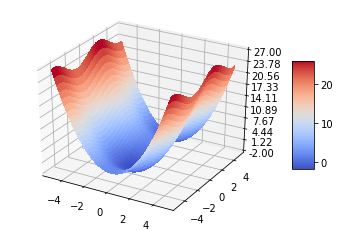

In [3]:


X = np.arange(-5, 5, 0.025)
Y = np.arange(-5, 5, 0.025)
f = lambda x, y : x**2 + 2 * np.sin(y)

plot_function(X, Y, f)



# Plot Gradient Function

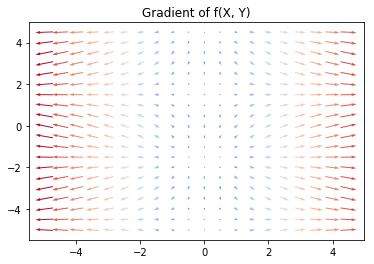

In [4]:
Xm, Ym = np.meshgrid(X, Y)
df = lambda x, y : (2 * x, 2 * np.cos(y))
U, V = df(Xm, Ym)

plt.figure()
plt.title('Gradient of f(X, Y)')
Clr = np.hypot(U, V)
d = 20
Q = plt.quiver(Xm[::d, ::d], Ym[::d, ::d], U[::d, ::d], V[::d, ::d],
               Clr[::d, ::d], pivot='mid', cmap=cm.coolwarm)




A couple of things to note about the gradient:

    Although F is a scalar-valued function, the gradient is a vector-valued function, basically meaning that the gradient has an inherent direction that is important to its meaning. The gradient is describing direction in the original input space of (x, y), so it will have as many components as the input space.
    The gradient at F(x_{m}, y_{m}) (the Matterhorn) will be zero, since there is no direction in which the function is ascending. Likewise, the gradient at F(x_{d}, y_{d}) will be zero for the same reason. These two points are a maximum and a minimum of F, respectively. Such points are called extrema and include maxima, minima, and saddle points, which will be discussed later.
    Earlier it was mentioned that "the gradient in Zurich (x_{z}, y_{z}) might point you towards the Matterhorn (x_{m}, y_{m})." For a convex function, this would be the case. However, the F in our example is clearly highly non-convex, so the gradient of F evaluated at (x_{z}, y_{z}) may or may not lead towards (x_{m}, y_{m}). It may even be itself an extremum.

